<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/3.HandsOnIntro-Supervised%20Regression/BikeDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Understanding

## About Dataset


**Variables Description**
*  Date: The date of the observation.
*  Rented Bike Count: The number of bikes rented during the observation period.
*  Hour: The hour of the day when the observation was taken.
*  Temperature(°C): The temperature in Celsius at the time of observation.
*  Humidity(%): The percentage of humidity at the time of observation.
*  Wind speed (m/s): The wind speed in meters per second at the time of observation.
*  Visibility (10m): The visibility in meters at the time of observation.
*  Dew point temperature(°C): The dew point temperature in Celsius at the time of observation.
*  Solar Radiation (MJ/m2): The amount of solar radiation in mega-joules per square meter at the time of observation.
*  Rainfall(mm): The amount of rainfall in millimeters during the observation period.
*  Snowfall(cm): The amount of snowfall in centimeters during the observation period.
*  Seasons: The season of the year when the observation was taken.
*  Holiday: Whether the observation was taken on a holiday or not.
*  Functioning Day: Whether the bike sharing system was operating normally or not during the observation period.

## References
1. https://www.sciencedirect.com/science/article/abs/pii/S0140366419318997


2. https://data.mendeley.com/datasets/zbdtzxcxvg/2

3. https://github.com/ayush9304/BikeSharingDemandPrediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# !pip install shap==0.40.0
# import shap
# import graphviz

# import pickle

# sns.set(style='whitegrid')
# pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515074 sha256=0609c32f70494d3ffa1c9078cfaf150c806e503410da0f0137e1479e515abe00
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

# Load and Initial Exploration of Data

In [3]:
#load data
dataset=pd.read_csv('SeoulBikeData.csv',encoding="latin")

In [4]:
#first look at data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# rows and column count
dataset.shape

(8760, 14)

## Inspecting Data





### Overall data informatiom

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Duplicate Data

In [7]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape[0]


0

### Missing Data

In [8]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

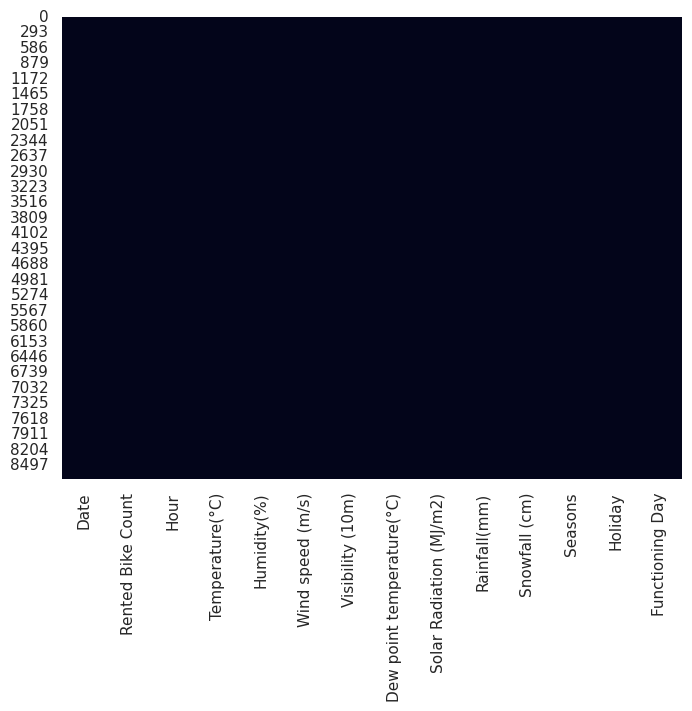

In [9]:

# Visualizing the missing values
plt.figure(figsize=(8,6))
sns.heatmap(dataset.isnull(), cbar=False)

### Check for inconsistencies

In [10]:
# check for inconsistencies in object type variables
# 'Seasons', 'Holiday', 'Functioning Day'
print("Seasons",dataset['Seasons'].unique())
print("Holiday",dataset['Holiday'].unique())
print("Functioning Day",dataset['Functioning Day'].unique())


Seasons ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday ['No Holiday' 'Holiday']
Functioning Day ['Yes' 'No']


## Observations and Actions

* There are no null values(NaN)

* There is no inconsistencies in object type variable values

* There is no duplicate record

* Holiday and Functioning Day has 2 unique category while Seasons has 4 unique category(which are nominal in nature- or no ordinality).This we have to consider during categorical encoding

* data type needs to be changed for object type variable Date  needs to be converted into a datetime64[ns] data type.


## Understanding  Variables

In [11]:
# Dataset Describe
dataset.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data Wrangling

In [12]:
df=dataset.copy()
df.shape


(8760, 14)

## Clean Data

In [13]:
# Changing the "Date" column dtype to datetime
#Converting Data Types for better analysis and accessibility to information
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

### Feature Engineering

In [14]:
# Creating new columns Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
# df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()  # we better understand names (monday, friday etc) instead of numbers

In [15]:
# Determine if the date is a weekend (Saturday=5, Sunday=6)
df['Is_Weekend'] = df['Date'].dt.weekday >= 5


In [16]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,weekday,Is_Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,False


In [17]:
# Unique hours
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [18]:
# Changing Hour, Year, Month dtypes to categorical
#Converting Data Types for better analysis
for col in ['Year', 'Month', 'weekday','Is_Weekend']:
  df[col] = df[col].astype('category')
df['Hour']=df['Hour'].astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### Extract Numerical Cols and Categorical Data

In [20]:
#check for object and numerical data
object_cols=df.select_dtypes(include=['object','category']).columns.tolist()
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
print("object col:",object_cols)
print("num col:",num_cols)

object col: ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month', 'weekday', 'Is_Weekend']
num col: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


# EDA

In [21]:
df.describe()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


### Insight
The range of 'Rented Bike Count' is from 0 to 3556, while the range of 'Temperature(°C)' is from -17.8 to 39.4.
'Temperature(°C)' has a mean of approximately 12.88 with a standard deviation of 11.94, whereas 'Rented Bike Count' has a mean of approximately 704.60 with a standard deviation of 644.99.

### Action
The scale of these features varies significantly. When training machine learning models, algorithms often calculate distances between data points. If one feature has a much larger scale than others, it can dominate the calculation and lead to biased results.

By scaling the features, we bring them to a similar range, preventing any single feature from dominating the learning process. This ensures that each feature contributes equally to the model's decision-making process, leading to more stable and reliable predictions. Therefore, data scaling is essential for effective machine learning model training.

## Univariate Analysis

###  Distribution of Rented Bike Count

In [22]:

# Statistical properties of Rented Bike Count
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Text(0.5, 1.0, 'Rented Bike Count Box Plot')

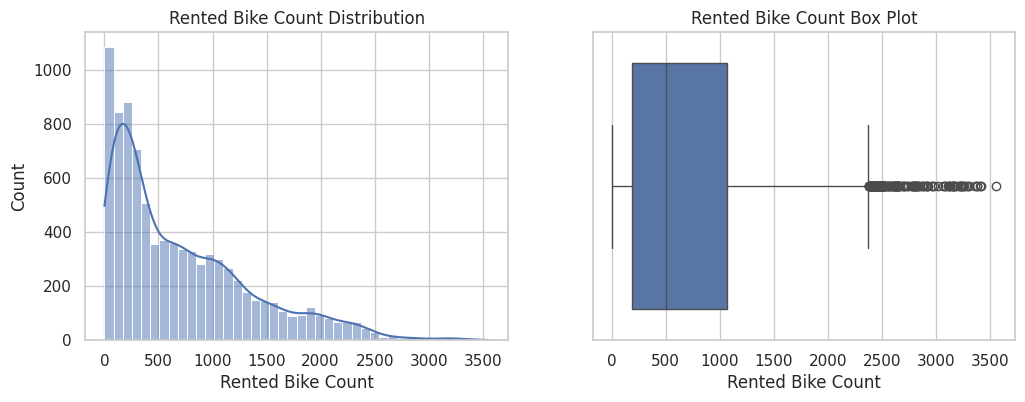

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(x='Rented Bike Count', data=df, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,2,2)
sns.boxplot(x='Rented Bike Count', data = df)
plt.title("Rented Bike Count Box Plot")


#### Insight:
The 'Rented Bike Count' data exhibits a right/positively skewed distribution, indicating that most instances involve a lower number of bike rentals, with fewer instances of large rental numbers. Additionally, outliers are present in the data.

#### Action:
Given the positively skewed distribution and the presence of outliers, adjustments are needed to ensure compatibility with machine learning algorithms. Applying transformations can address skewness, while outlier handling techniques are necessary to improve algorithm robustness and accuracy.

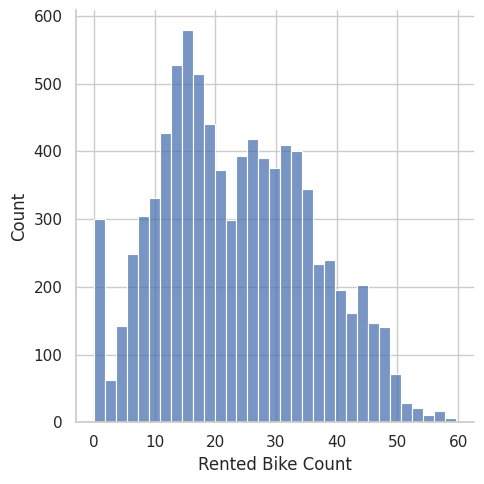

In [24]:
# view with different transformations
#Square Root
# sqrt_rentedbike_cnt=np.sqrt(df["Rented Bike Count"])
sns.displot(np.sqrt(df["Rented Bike Count"]))

divide by zero encountered in log


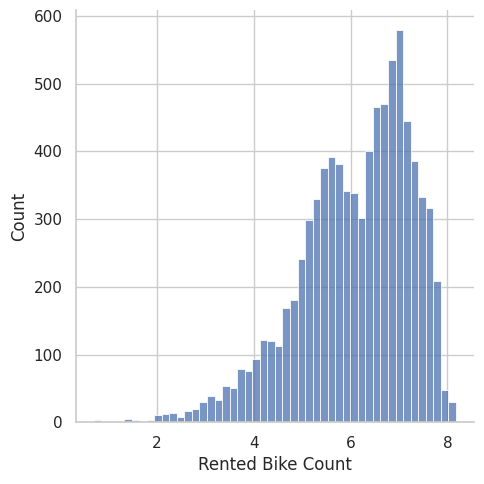

In [25]:
# Log Transformation
# log_rentedbike_cnt=np.log(df["Rented Bike Count"])
sns.displot(np.log(df["Rented Bike Count"]))

### Distribution of all numeric variables

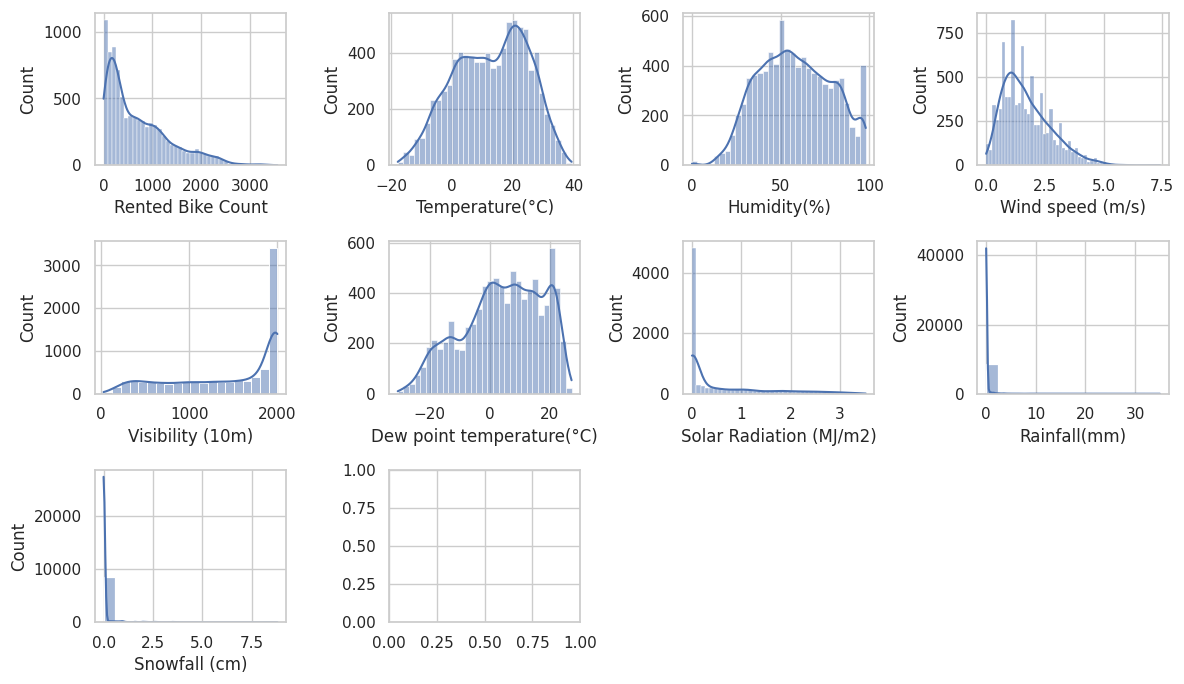

In [26]:

fig, axes = plt.subplots(3, 4, figsize=(12, 7))
axes = axes.flatten()

for i, var in enumerate(num_cols):
        sns.histplot(x=var, ax=axes[i], data=df, kde=True)
axes[-1].axis('off')
axes[-2].axis('off')
plt.tight_layout()
plt.show()

In [27]:
#Check skewness of each variable
df[num_cols].skew().sort_values()

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

#### Insight and action
'Rented Bike Count', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', and 'Rainfall(mm)' are the variables that likely need transformation to address their skewness.

## Bivariate Analysis

### Analyzing the relationship of target variable with categorical variables




In [28]:
# Create a pivot table for each categorical variable
for col in object_cols:
    pivot_table = df.pivot_table(index=col, values='Rented Bike Count', aggfunc='mean')
    print(f"Pivot Table for {col}:")
    print(pivot_table)
    print("\n")

Pivot Table for Hour:
      Rented Bike Count
Hour                   
0            541.460274
1            426.183562
2            301.630137
3            203.331507
4            132.591781
5            139.082192
6            287.564384
7            606.005479
8           1015.701370
9            645.983562
10           527.821918
11           600.852055
12           699.441096
13           733.246575
14           758.824658
15           829.186301
16           930.621918
17          1138.509589
18          1502.926027
19          1195.147945
20          1068.964384
21          1031.449315
22           922.797260
23           671.126027


Pivot Table for Seasons:
         Rented Bike Count
Seasons                   
Autumn          819.597985
Spring          730.031250
Summer         1034.073370
Winter          225.541204


Pivot Table for Holiday:
            Rented Bike Count
Holiday                      
Holiday            499.756944
No Holiday         715.228026


Pivot Table for 

In [29]:
print(object_cols)

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month', 'weekday', 'Is_Weekend']


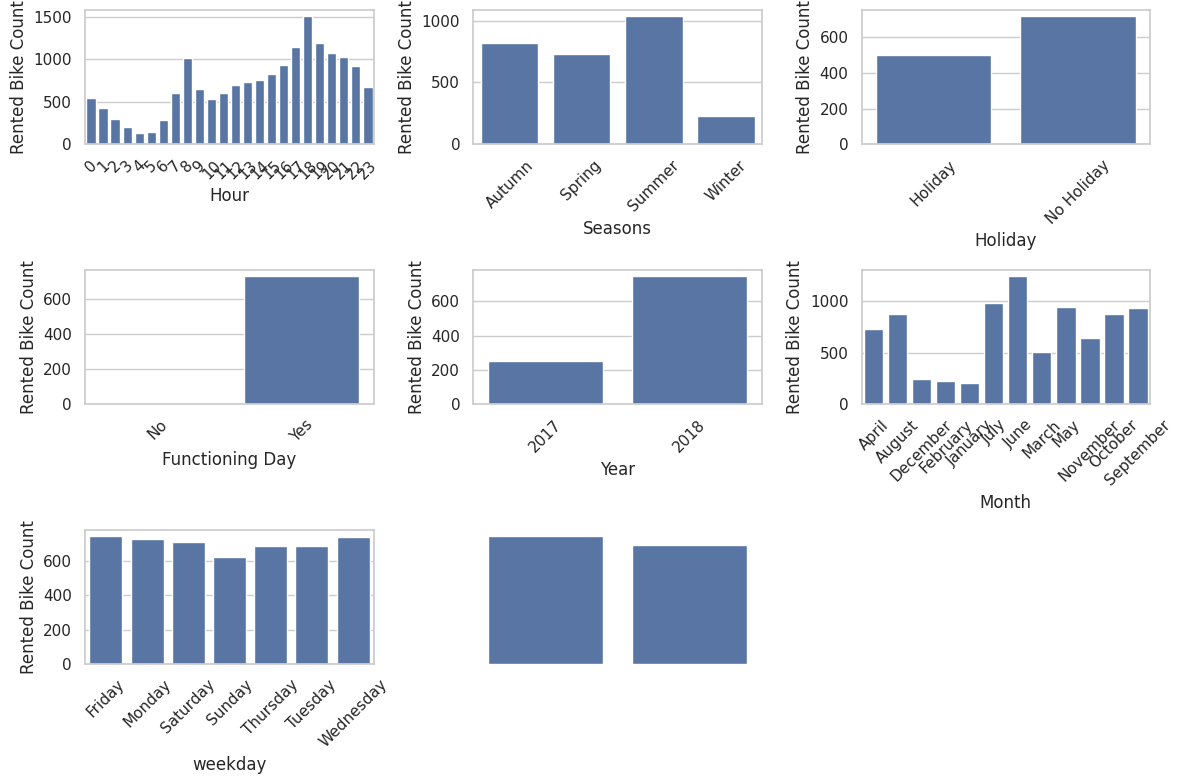

In [30]:
# count of rented bike count against value of categorical variables
# check if target variable is influenced by variation in value of categorical variables

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(object_cols):
        bike_count_grouped = df.groupby(col)['Rented Bike Count'].mean().reset_index()
        sns.barplot(x=col, y='Rented Bike Count', data=bike_count_grouped, ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
axes[-1].axis('off')
axes[-2].axis('off')
plt.tight_layout()
plt.show()


* the rentals bike service is not functioning on non functioning day, there is no demand

* Rentals Bike demand is more in summer months like May, June, July etc compared to winter months like December, January, February etc.

* Rentals Bike demand is highest in summer season and lowest in winter season.

### Analyzing the relationship of target variable with numeric variables

####  Rented Bike Count with Hours

Text(0.5, 1.0, 'Rented Bike Count trend by Hour')

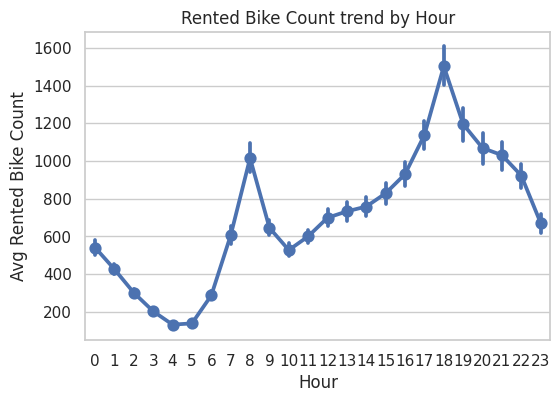

In [31]:
# Average Rented Bike Count by Hour
plt.figure(figsize=(6,4))
sns.pointplot(x='Hour', y='Rented Bike Count', data=df)
plt.ylabel("Avg Rented Bike Count")
plt.title("Rented Bike Count trend by Hour")

* The demand is higher during rush hour (i.e., 7-9AM and 5-7PM) when people go to offices/schools and come back in evening.



### relationship of other continuous variables

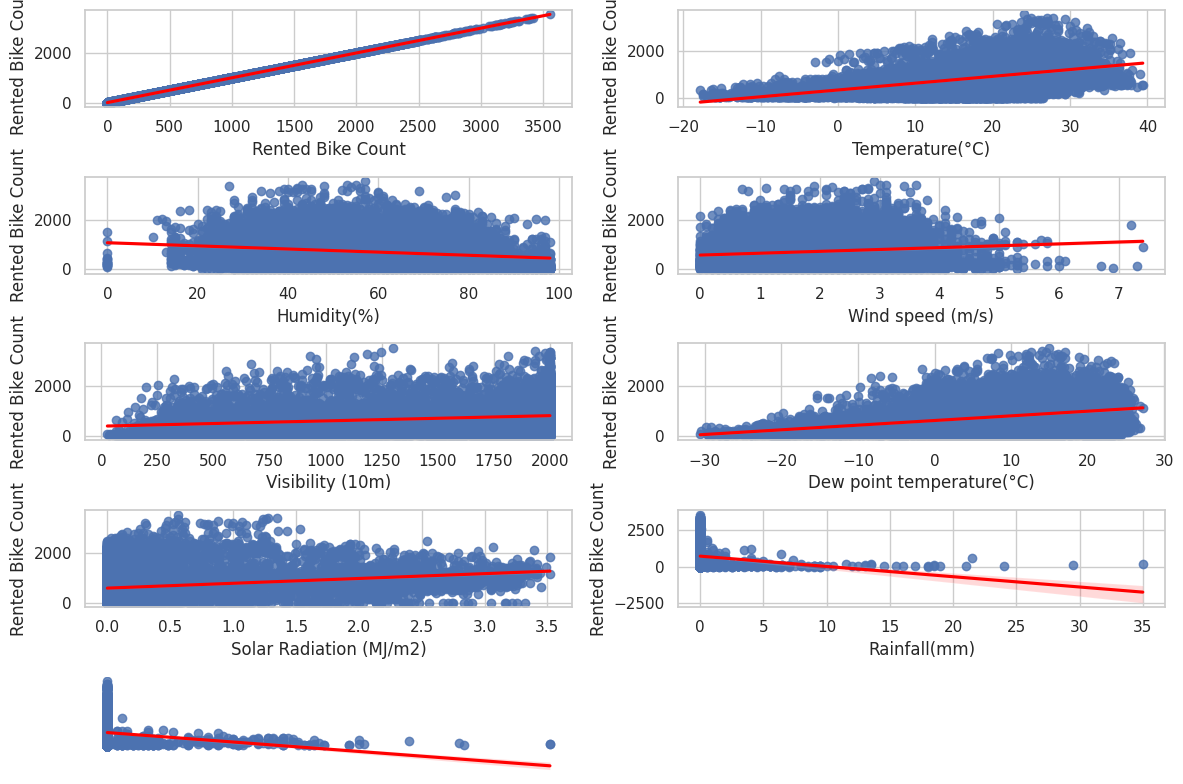

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):

        sns.regplot(x=col, y='Rented Bike Count', data=df, ax=axes[i],line_kws={"color": "red"})
axes[-1].axis('off')
axes[-2].axis('off')
plt.tight_layout()
plt.show()


## Multivariate Analysis

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

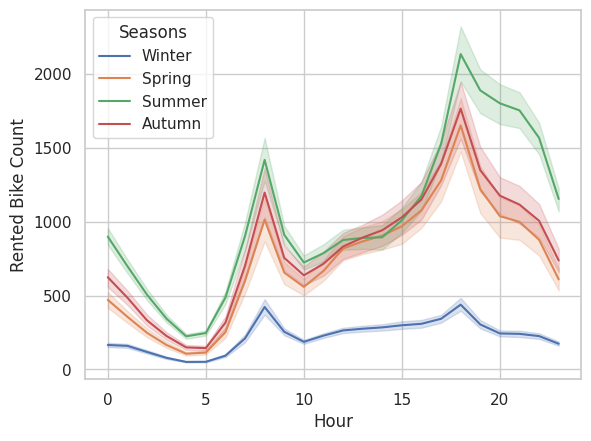

In [33]:
# Season wise Hour Impact on rented Bike Count
sns.lineplot(x='Hour',y='Rented Bike Count',hue='Seasons',data=df)

* The Rentals Bike demand trend pattern is same for all the seasons only levels are different. Demand level in winter is lowest and highest in Summer

### Correlation and multicolinearity

In [34]:
# Calculate the correlation coefficients between each feature and the target variable
corr = df[num_cols].corr()["Rented Bike Count"]
# Sort the correlation coefficients in descending order
sorted_corr = corr.sort_values(ascending=False)

print(sorted_corr)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


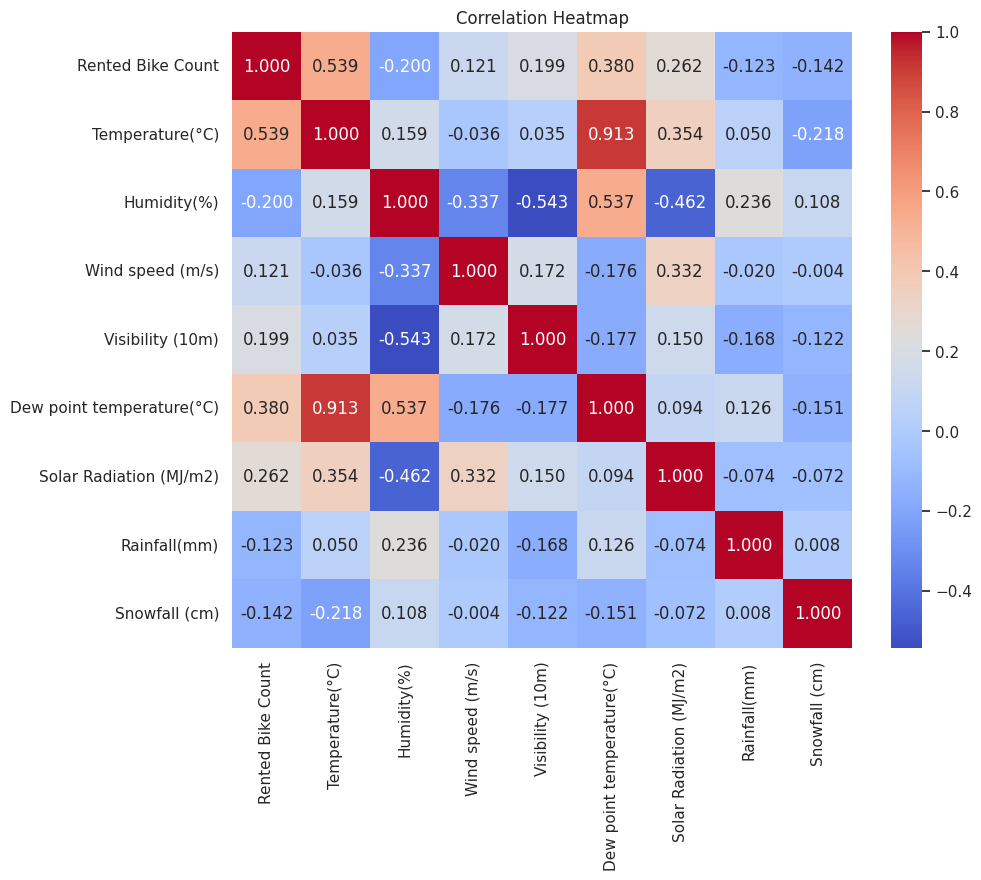

In [35]:
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
# Create heatmap
sns.heatmap(corr.transpose(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

calc_vif(df.select_dtypes(include=['float','int']).drop('Rented Bike Count', axis=1))

,feature,VIF
0,Temperature(°C),29.075866
4,Dew point temperature(°C),15.201989
3,Visibility (10m),9.051931
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
5,Solar Radiation (MJ/m2),2.821604
7,Snowfall (cm),1.118903
6,Rainfall(mm),1.079919


#### Insights
* Temperature(°C): VIF of 33.39 indicates high multicollinearity with other variables, suggesting that temperature may be highly correlated with other predictors in the model.

* Dew point temperature(°C): VIF of 17.13 also suggests high multicollinearity, indicating strong correlation with other predictors.

* Visibility (10m): VIF of 9.09 indicates moderate multicollinearity, implying some correlation with other predictors but less severe compared to temperature and dew point temperature.

* Humidity(%), Wind speed (m/s), Hour: These variables have VIF values ranging from 4.42 to 5.37, suggesting moderate multicollinearity with other predictors.

* Solar Radiation (MJ/m2), Snowfall (cm), Rainfall(mm): These variables have relatively low VIF values (less than 3), indicating minimal multicollinearity with other predictors.

#### Actions
We can remove either of dewpoint temperature and temperature as they are highly correlated.The one which is highly correlated to the target variable is temperature so we will drop dew point temperature

Similary Humidity and Dew Point temparature is highly correlated.We are already dropping Dew Point Temperature



### Finally
Based on EDA and correlation heatmap in above section, we saw various features that has impact on target variable output. For example, we saw how temperature increase causes demand to increase, rainfall and snowfall decreases the demand, certain seasons have higher demand compared to other seasons, certain hour (rush hour) have more demand, visibility has posivitive effect on demand, too much humidity decreases demand etc.

# Data Pre-processing

### Outlier Treatment

### Categorical Encoding

#### Identify unique values

In [37]:
cat_cols=['Seasons', 'Holiday','Functioning Day', 'Month', 'weekday','Is_Weekend']
for col in cat_cols:
  print(col,df[col].unique())


Seasons ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday ['No Holiday' 'Holiday']
Functioning Day ['Yes' 'No']
Month ['December', 'January', 'February', 'March', 'April', ..., 'July', 'August', 'September', 'October', 'November']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']
weekday ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']
Is_Weekend [False, True]
Categories (2, bool): [False, True]


#### One Hot Encoding


In [38]:
# Below categorical columns needs encoding using one hot encoding
d = df[['Seasons', 'Holiday','Functioning Day', 'Month', 'weekday',
        'Is_Weekend']]
encoded_df = pd.get_dummies(d, drop_first=True,dtype=int)
df = pd.concat([df, encoded_df], axis=1)
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,weekday,Is_Weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Is_Weekend_True
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,False,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,False,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df['Hour']=df['Hour'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Drop Redundant Feature and Data

In [40]:
## Removing Data of
# Removing data of non functional days (non rented days)
df = df.drop(df[df['Functioning Day'] == 'No'].index)

# Since all values in Functioning Day Column is same, removing Functioning Day Column
df = df.drop(['Functioning Day'], axis = 1)

### Feature Selection

In [41]:
df.shape

(8465, 40)

In [42]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Year', 'Month', 'weekday', 'Is_Weekend', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Is_Weekend_True'],
      dtype='object')

In [43]:

# Features selected for modelling which includes:
# 1. Numerical (Continuous) Features
# 2. Encoded Categorical Features
filtered_features = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Visibility (10m)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday',  'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
      'Is_Weekend_True'] #'prev_rented_bike_count'

df2 = df[filtered_features]
df2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Rainfall(mm),Snowfall (cm),Wind speed (m/s),Solar Radiation (MJ/m2),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Is_Weekend_True
0,254,0,-5.2,37,2000,0.0,0.0,2.2,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,2000,0.0,0.0,0.8,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Transformation

Temperature(°C) , Humidity(%), visibility is already approx normal. Transformed Wind speed (m/s)_capped to approx normal using np.sqrt



Text(0.5, 1.0, 'Rented Bike Count (sqrt) Distribution')

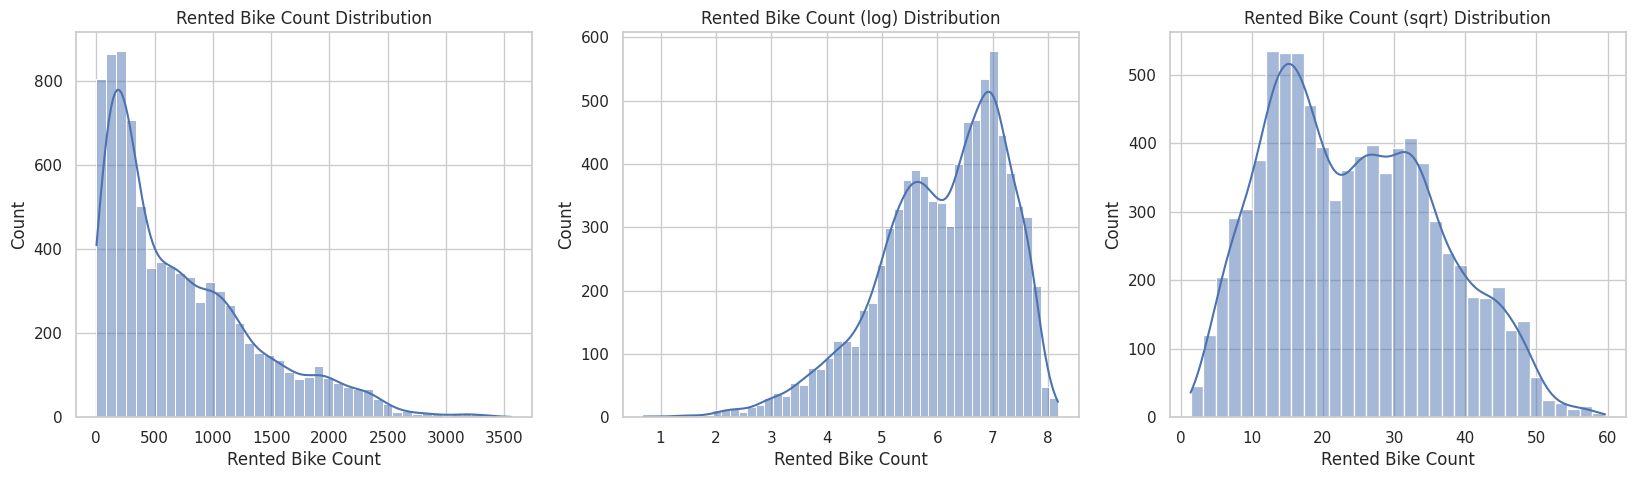

In [44]:
# Transforming 'Rented Bike Count' to normal
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(x='Rented Bike Count', data=df2, kde=True)
plt.title("Rented Bike Count Distribution")

plt.subplot(1,3,2)
sns.histplot(np.log(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (log) Distribution")

plt.subplot(1,3,3)
sns.histplot(np.sqrt(df2['Rented Bike Count']), kde=True)
plt.title("Rented Bike Count (sqrt) Distribution")

In [45]:

# Transforming Rented Bike Count using np.sqrt
df2['Rented Bike Count'] = np.sqrt(df2['Rented Bike Count'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


divide by zero encountered in log


Text(0.5, 1.0, 'Wind speed (m/s) Count (sqrt) Distribution')

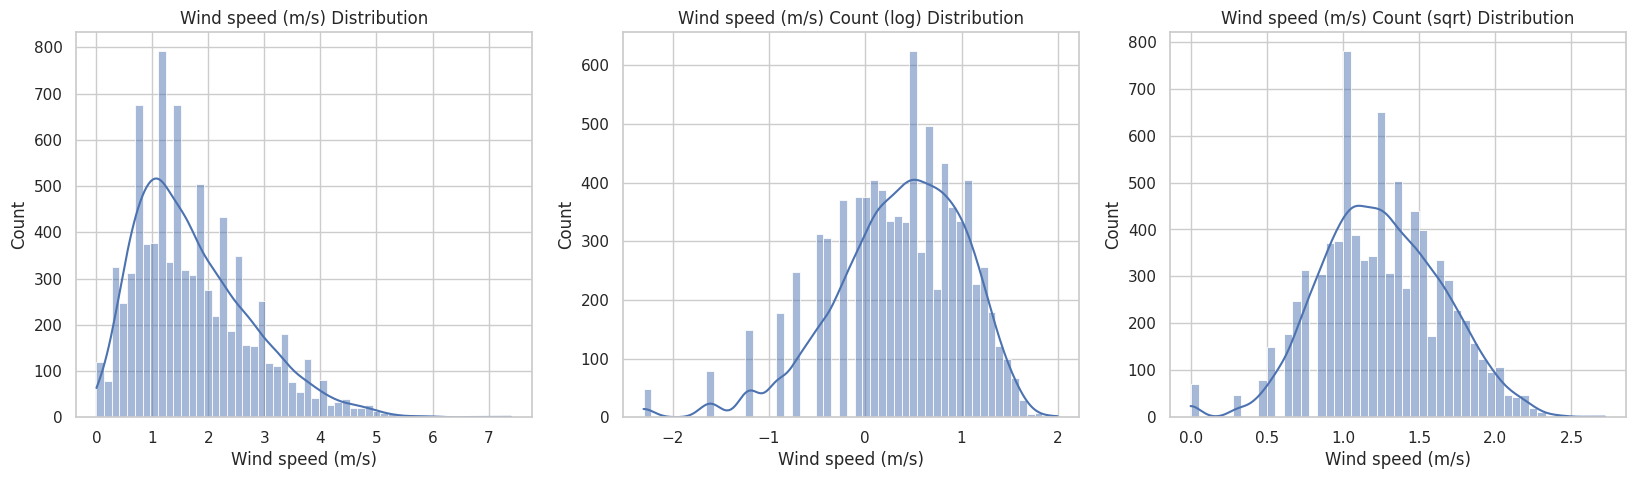

In [46]:
#Transforming 'Rented Bike Count' to normal
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(x='Wind speed (m/s)', data=df2, kde=True)
plt.title("Wind speed (m/s) Distribution")

plt.subplot(1,3,2)
sns.histplot(np.log(df2['Wind speed (m/s)']), kde=True)
plt.title("Wind speed (m/s) Count (log) Distribution")

plt.subplot(1,3,3)
sns.histplot(np.sqrt(df2['Wind speed (m/s)']), kde=True)
plt.title("Wind speed (m/s) Count (sqrt) Distribution")

In [47]:

# Transforming Wind Speed using np.sqrt
df2['Wind speed (m/s)'] = np.sqrt(df2['Wind speed (m/s)'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Train Test Split

In [48]:

# Splitting data into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(df2.drop("Rented Bike Count", axis=1), df2["Rented Bike Count"], test_size = 0.25, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6348, 30)
Number transactions y_train dataset:  (6348,)
Number transactions X_test dataset:  (2117, 30)
Number transactions y_test dataset:  (2117,)


### Data Scaling

In [49]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Modelling

## ML Model - 1 - Linear Regression

In [50]:

# ML Model - 1 Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train, y_train)

# Predict on the model
train_preds = linear_reg.predict(X_train)
test_preds = linear_reg.predict(X_test)

In [51]:
print("Training Data:")
print("MSE:", mean_squared_error(y_train, train_preds))
print("MAE:", mean_absolute_error(y_train, train_preds))
print("R2 Score:", r2_score(y_train, train_preds))

Training Data:
MSE: 48.87759849831247
MAE: 5.348424728610179
R2 Score: 0.6538934664543854


In [52]:
print("Test Data:")

mse = mean_squared_error(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)
print("Testing Data:")
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

Test Data:
Testing Data:
MSE: 49.024819041552405
MAE: 5.307057783207018
R2 Score: 0.6465341433161886


In [53]:
# Dictionary to store different models accuracies
model_results = {}

In [54]:
# Storing model performance for comparision later
model_results['Linear Regression'] = [r2, mse, mae]

In [55]:
# Get the default parameters
default_params = linear_reg.get_params()
print(default_params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


## Train Multiple Models and Compare the Performance

In [56]:
# Create  a function to calculate metrics to evaluate given model
def get_metrics(y_true, y_pred, model_name):
  metrics = {
      'Model': model_name,
      'MAE': mean_absolute_error(y_true, y_pred),
      'MSE': mean_squared_error(y_true, y_pred),
      'RMSE': mean_squared_error(y_true, y_pred, squared=False),
      'R2': r2_score(y_true, y_pred)
  }
  return metrics



In [57]:
from sklearn.linear_model import Ridge,Lasso
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [58]:
# Train Models and Predict
rir=Ridge().fit(X_train,y_train)
y_pred_rir=rir.predict(X_test)


lasso=Lasso().fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

svr=SVR().fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

knr=KNeighborsRegressor().fit(X_train,y_train)
y_pred_knr=knr.predict(X_test)

rfr=RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

dtr=DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr=dtr.predict(X_test)

xgbr=XGBRegressor().fit(X_train,y_train)
y_pred_xgbr=xgbr.predict(X_test)

# Evaluate models
metrics_list = []

metrics_list.append(get_metrics(y_test, y_pred_rir, "Ridge"))
metrics_list.append(get_metrics(y_test, y_pred_lasso, "Lasso"))
metrics_list.append(get_metrics(y_test, y_pred_svr, "SVR"))
metrics_list.append(get_metrics(y_test, y_pred_knr, "KNR"))
metrics_list.append(get_metrics(y_test, y_pred_rfr, "Random Forest"))
metrics_list.append(get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor"))
metrics_list.append(get_metrics(y_test, y_pred_xgbr, "XGBRegressor"))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

                   Model       MAE         MSE       RMSE        R2
0                  Ridge  5.307347   49.027051   7.001932  0.646518
1                  Lasso  6.093759   61.584560   7.847583  0.555979
2                    SVR  9.191452  122.059387  11.048049  0.119960
3                    KNR  5.460668   53.737991   7.330620  0.612552
4          Random Forest  2.038836   11.193564   3.345678  0.919295
5  DecisionTreeRegressor  2.637125   18.636688   4.317023  0.865631
6           XGBRegressor  1.864755    9.054638   3.009093  0.934717


In [59]:
# # Evaluate Models
# get_metrics(y_test,y_pred_rir,"Ridge")
# get_metrics(y_test,y_pred_lasso,"Lasso")
# get_metrics(y_test,y_pred_svr,"SVR")
# get_metrics(y_test,y_pred_knr,"KNR")
# get_metrics(y_test,y_pred_rfr,"Random Forest")
# get_metrics(y_test,y_pred_dtr,"DecisionTreeRegressor")
# get_metrics(y_test,y_pred_xgbr,"XGBRegressor")

# Evaluate models
metrics_list = []

metrics_list.append(get_metrics(y_test, y_pred_rir, "Ridge"))
metrics_list.append(get_metrics(y_test, y_pred_lasso, "Lasso"))
metrics_list.append(get_metrics(y_test, y_pred_svr, "SVR"))
metrics_list.append(get_metrics(y_test, y_pred_knr, "KNR"))
metrics_list.append(get_metrics(y_test, y_pred_rfr, "Random Forest"))
metrics_list.append(get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor"))
metrics_list.append(get_metrics(y_test, y_pred_xgbr, "XGBRegressor"))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

                   Model       MAE         MSE       RMSE        R2
0                  Ridge  5.307347   49.027051   7.001932  0.646518
1                  Lasso  6.093759   61.584560   7.847583  0.555979
2                    SVR  9.191452  122.059387  11.048049  0.119960
3                    KNR  5.460668   53.737991   7.330620  0.612552
4          Random Forest  2.038836   11.193564   3.345678  0.919295
5  DecisionTreeRegressor  2.637125   18.636688   4.317023  0.865631
6           XGBRegressor  1.864755    9.054638   3.009093  0.934717


#### Identify Model/s giving best performance

Error values should be closer to zero

Here We can identify from the results that Random Forest and XGBRegressor are giving best performance

# Hyperparameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 200, stop=2000, num=10)]

# Maximum Number of Features to Consider at every Split
max_features=['auto','sqrt']

# maximum numbers of levels allowed in each sample tree
max_depth=[int(x) for x in np.linspace(10,120, num=12)]

#Maximum number of samples required to split a node
min_samples_split=[2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4]

# Method of selecting samples for training each tree
bootstrap=[True,False]

#create the random grid
random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "bootstrap":bootstrap}

In [61]:
import time
start_time=time.time()
rf=RandomForestRegressor()
# Random search of parameters using 3 fold cross validation
# search across 100 different combinations and use all available cores
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,verbose=2,random_state=123)
rf_random.fit(X_train,y_train)
y_pred_rf_random=rf_random.predict(X_test)
y_pred_rf_random

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   7.5s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   3.2s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   3.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  27.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  26.6s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  27.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=  21.7s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=  21.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=  21.4s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   3.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   3.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, m

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  26.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  25.9s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  26.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  48.5s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  47.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  49.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  10.5s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  10.6s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  10.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   9.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   8.7s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   9.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   4.9s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   4.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   4.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  27.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  27.5s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  27.8s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  26.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  26.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  27.0s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  11.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  11.3s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  11.0s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  28.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  27.6s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  27.6s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=120, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.8s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=120, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=120, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.1s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.5s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.6s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  26.7s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  30.2s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  30.9s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=  30.5s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  11.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  11.3s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  11.4s


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


array([ 8.288577  , 27.11977018, 20.40121343, ..., 34.78049274,
       21.22563499, 18.24201168])

In [62]:
y_pred_rf_random

array([ 8.288577  , 27.11977018, 20.40121343, ..., 34.78049274,
       21.22563499, 18.24201168])

In [63]:
get_metrics(y_test,y_pred_rf_random,"Random Forest Tuning")


{'Model': 'Random Forest Tuning',
 'MAE': 2.046075218041443,
 'MSE': 11.033928389298467,
 'RMSE': 3.3217357494687123,
 'R2': 0.9204460714601403}

In [64]:
# find best parameters
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [65]:
rf_tuned=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 30,
 bootstrap= True)
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned=rf_tuned.predict(X_test)
get_metrics(y_test,y_pred_rf_tuned,"Random Forest Regressor with Best Parameters")

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


{'Model': 'Random Forest Regressor with Best Parameters',
 'MAE': 2.0429803881343096,
 'MSE': 11.107668330008625,
 'RMSE': 3.3328168761587587,
 'R2': 0.9199144111332999}

In [66]:
## Hyperparameter Tuning for XGBoost Regressor

import time
start_time=time.time()
params={
    "max_depth":[3,5,6,10,15,20],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":np.arange(0.5,1.0,0.1),
    "colsample_bytree":np.arange(0.4,1.0,0.1),
    "colsample_bylevel":np.arange(0.4,1.0,0.1),
    "n_estimators":[100,500,1000],

}
xgbr=XGBRegressor(seed=20)
rscv= RandomizedSearchCV(estimator=xgbr,param_distributions=params,scoring="neg_mean_squared_error",
                         n_iter=25,cv=5,verbose=1)
rscv.fit(X_train,y_train)
y_pred_xgb_rscv=rscv.predict(X_test)
get_metrics(y_test,y_pred_xgb_rscv,"XGBRegressor with best parameters")
print("time taken ",time.time()-start_time)
print("Best parameters:", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
time taken  386.06311655044556
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}


In [ ]:
xgb_tuned= XGBRegressor(subsample= 0.5, n_estimators= 1000, max_depth= 20, learning_rate= 0.01, colsample_bytree= 0.7999999999999999, colsample_bylevel= 0.4,seed=20)
xgb_tuned.fit(X_train,y_train)
y_pred_xgb_tuned=rscv.predict(X_test)
get_metrics(y_test,y_pred_xgb_tuned,"XGBRegressor with best parameters")